In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [2]:
PROJECT_ROOT = Path.cwd().parent
os.chdir(PROJECT_ROOT)

In [3]:
df = pd.read_csv("data/raw/Titanic-Dataset.csv")

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

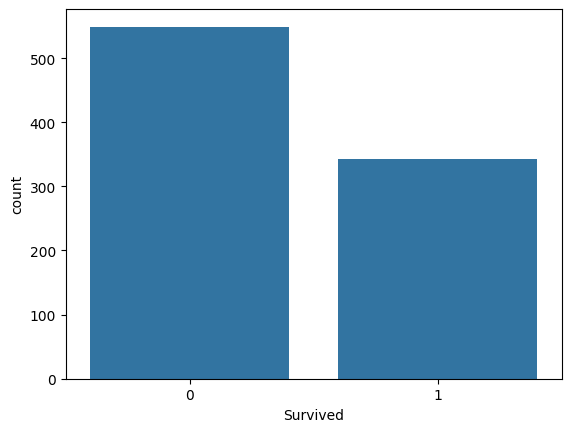

In [11]:
sns.countplot(x='Survived',data = df)
plt.show()

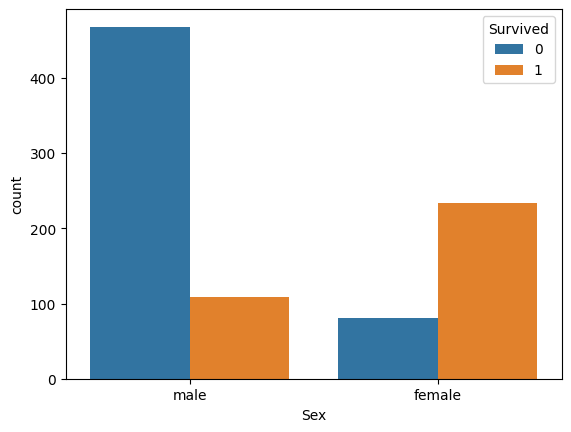

In [12]:
sns.countplot(x='Sex',hue ='Survived',data = df )
plt.show()

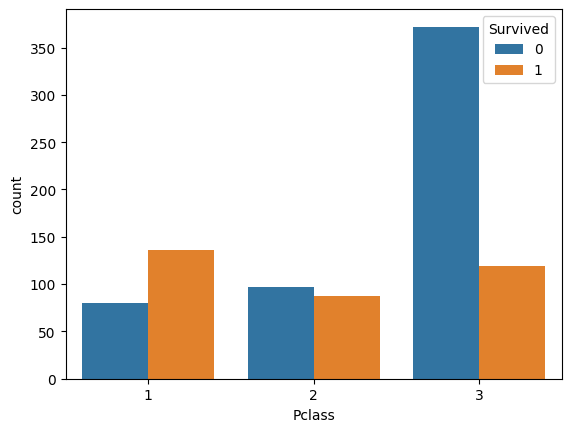

In [13]:
sns.countplot(x='Pclass',hue ='Survived',data = df )
plt.show()

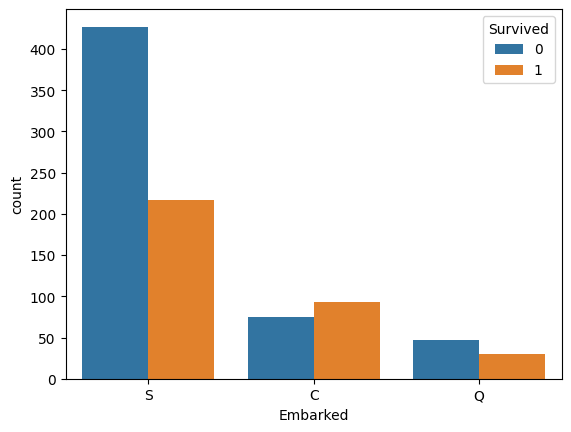

In [14]:
sns.countplot(x='Embarked',hue ='Survived',data = df )
plt.show()

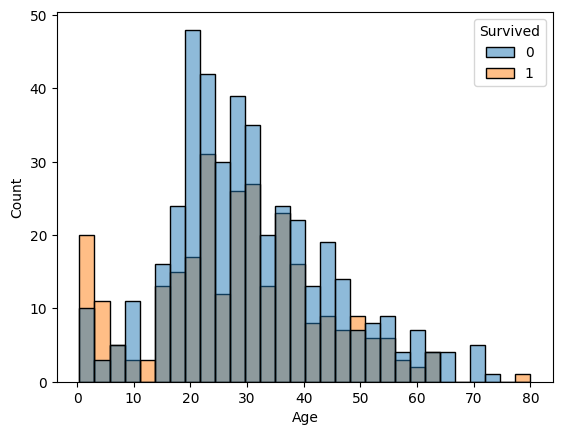

In [17]:
sns.histplot(data=df,x='Age',hue ='Survived',bins=30)
plt.show()

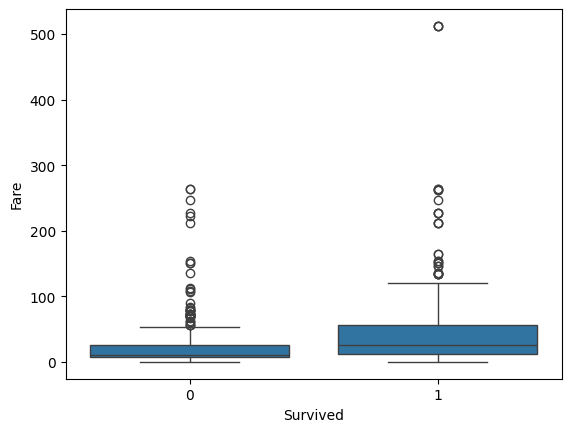

In [20]:
sns.boxplot(x='Survived',y='Fare',data=df)
plt.show()

In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

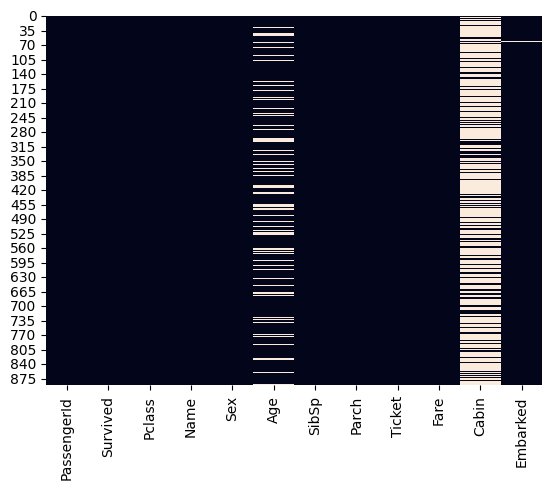

In [22]:
sns.heatmap(df.isna(),cbar=False)
plt.show()

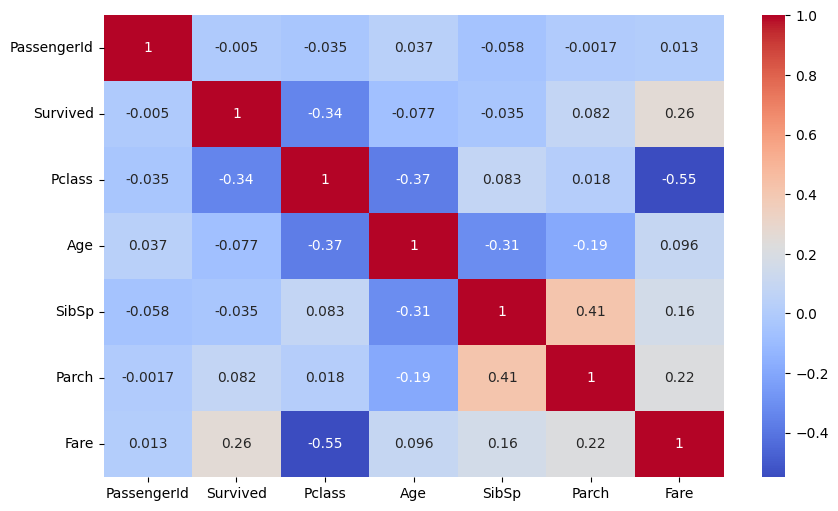

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

## Выводы 
В ходе разведочного анализа данных было выявленно ,что целевая переменная имеет дисбаланс классов .Признаки $sex$ и $Pclass$ демонстируют сильную связь с выживаимостью пассажиров и являются наиболее информативными .Признаки $Age$ и $Farge$ содержат полезные ,но менее выраженный сигнал .В данных присутсвуют пропуски ,наиболее значимые в признаки $Cabin$ ,который содержит большое количество пропусков ,в следствие может быть исключен в дальнеишее.